## Exploratory Data Analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones

### 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers

## The entire process is highly iterative

In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Importing the dataset
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [94]:
# Shape
df.shape

(891, 12)

In [95]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

## Numerical Columns

- Age 
- Fare
- PassengerId

## Mixed Columns

- Name
- Ticket
- Cabin

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [100]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [101]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [102]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

In [103]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [104]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [105]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.7+ KB


In [107]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62.0 people died in the accident


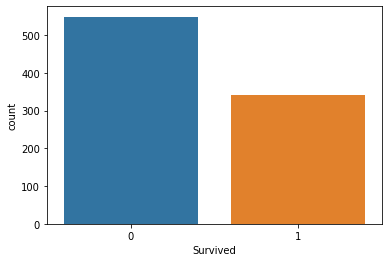

In [108]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


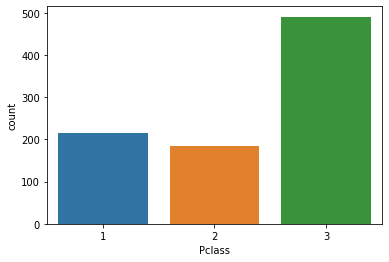

In [109]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


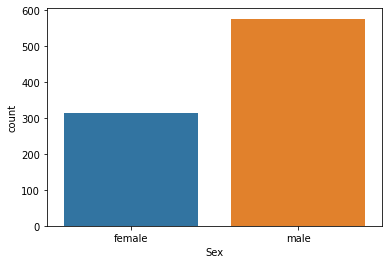

In [110]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


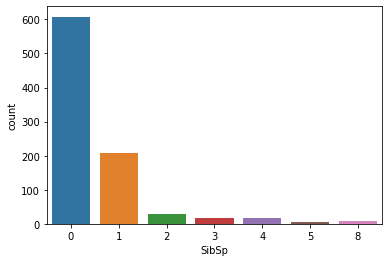

In [111]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


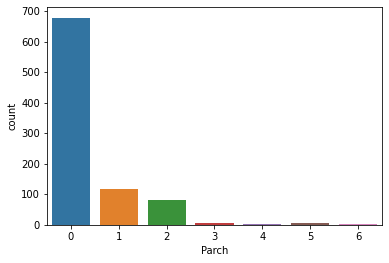

In [112]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


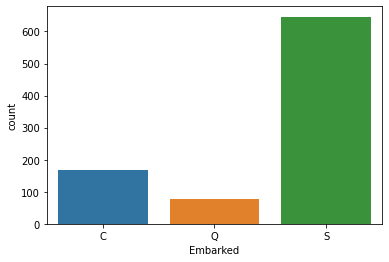

In [113]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

0.45956263424701577
0.9865867453652877


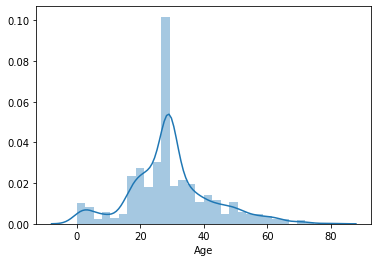

In [114]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

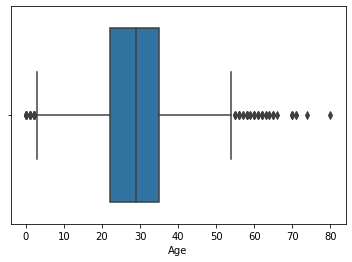

In [115]:
sns.boxplot(df['Age'])

In [116]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

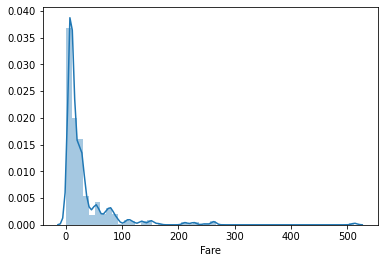

In [117]:
# Fare column

sns.distplot(df['Fare'])

In [118]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


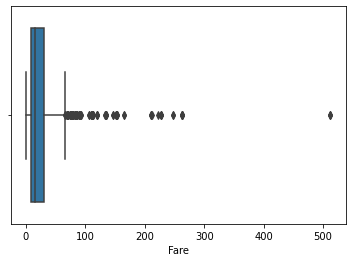

In [119]:
sns.boxplot(df['Fare'])

In [120]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


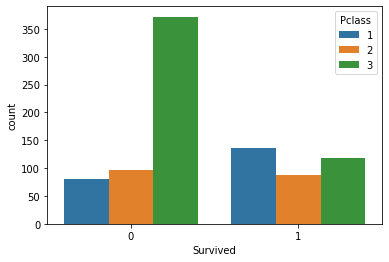

In [121]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


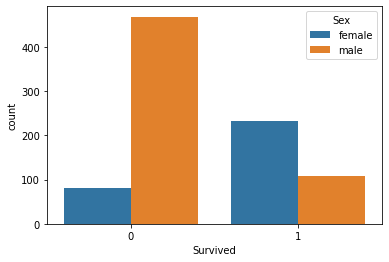

In [122]:
# Survival with Sex

sns.countplot(df['Survived'], hue=df['Sex'])

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


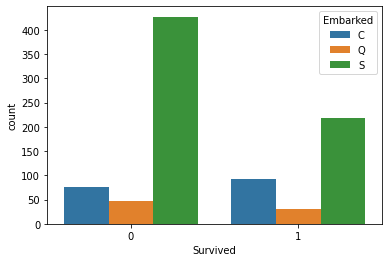

In [123]:
# Survival with Embarked

sns.countplot(df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

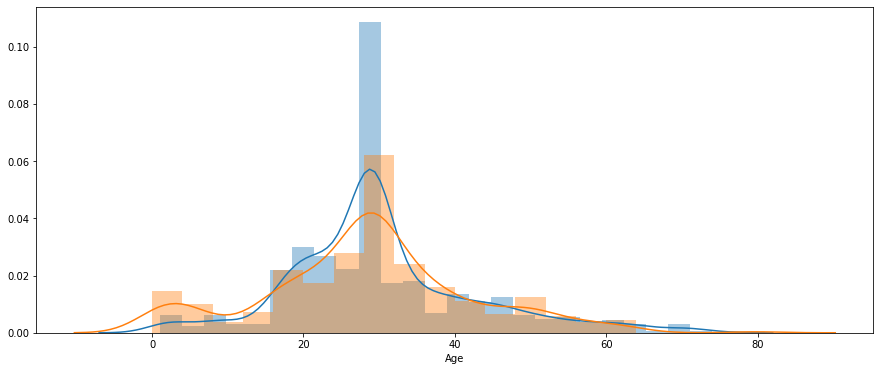

In [124]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

In [ ]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [ ]:
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [ ]:
df.sample(5)

In [ ]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [ ]:
df['family_type']=df['family_size'].apply(family_type)

In [ ]:
df.sample(5)

In [ ]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [ ]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

In [ ]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [ ]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

In [ ]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

## Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

## Communicating Results

- You can write a report/blog etc
- You can give a PPT in front of others
- You can describe the results face to face
